In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


%matplotlib inline

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Target Variable Distribution


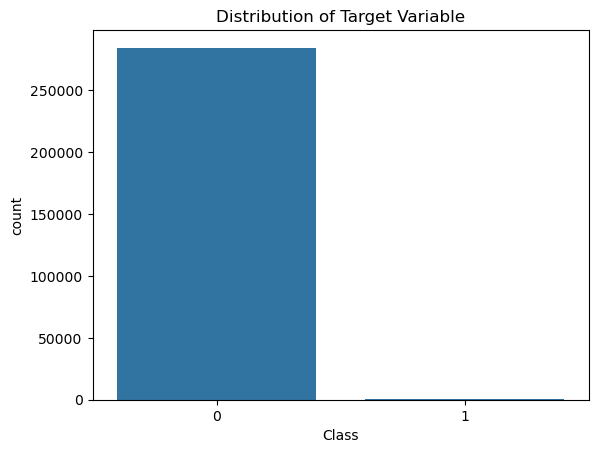

In [6]:
print("Target Variable Distribution")
sns.countplot(x="Class",data=df)
plt.title("Distribution of Target Variable")
plt.show()

In [7]:
non_fraud=df[df.Class==0]
fraud=df[df.Class==1]

In [8]:
print(non_fraud.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [9]:
non_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [12]:
non_fraud_sample=non_fraud.sample(n=492)

In [13]:
new_df=pd.concat([non_fraud_sample,fraud],axis=0)

In [14]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32726,36941.0,-0.260826,0.898628,2.047691,3.084595,-0.162609,0.915344,-0.063877,0.422369,-0.621286,...,-0.193913,-0.475129,0.217082,0.018949,-0.759855,-0.053890,-0.021312,0.046361,8.30,0
244257,152272.0,-0.311031,0.866357,0.281061,-0.562421,0.275203,-1.957418,1.313502,-0.328496,-0.128157,...,0.323996,0.854397,-0.178333,0.833020,0.277496,-0.262983,0.004816,0.053001,47.00,0
45969,42584.0,-0.369725,-0.420654,0.725675,-2.834129,0.065551,0.261638,0.219354,0.068147,-2.890763,...,-0.421880,-1.071572,0.090952,-1.229363,-0.213136,-0.629039,0.086507,0.103260,69.84,0
19061,29983.0,1.292242,0.557400,-0.900315,0.566942,0.539413,-0.668923,0.265311,-0.097328,-0.314819,...,-0.160818,-0.455595,-0.193701,-0.618856,0.638678,0.403977,-0.037975,0.023523,0.76,0
187338,127487.0,-1.080196,-0.898667,2.198977,1.140193,0.237009,0.313165,-0.412540,0.152993,0.595322,...,0.183833,0.305901,0.158341,0.539470,0.188840,-0.206920,-0.063433,-0.084863,135.76,0


In [15]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [16]:
new_df['Class'].mean()

0.5

In [17]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92967.026423,-0.017434,-0.019424,0.104309,-0.060273,0.023010,-0.024511,-0.007183,0.037136,0.014701,...,-0.005582,-0.003677,-0.007708,-0.018482,0.012555,0.005816,0.033557,-0.011717,-0.009442,80.036504
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


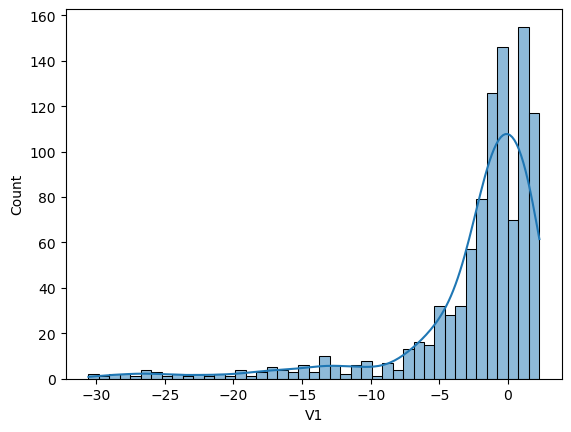

In [18]:
sns.histplot(new_df["V1"], kde=True)
plt.show()

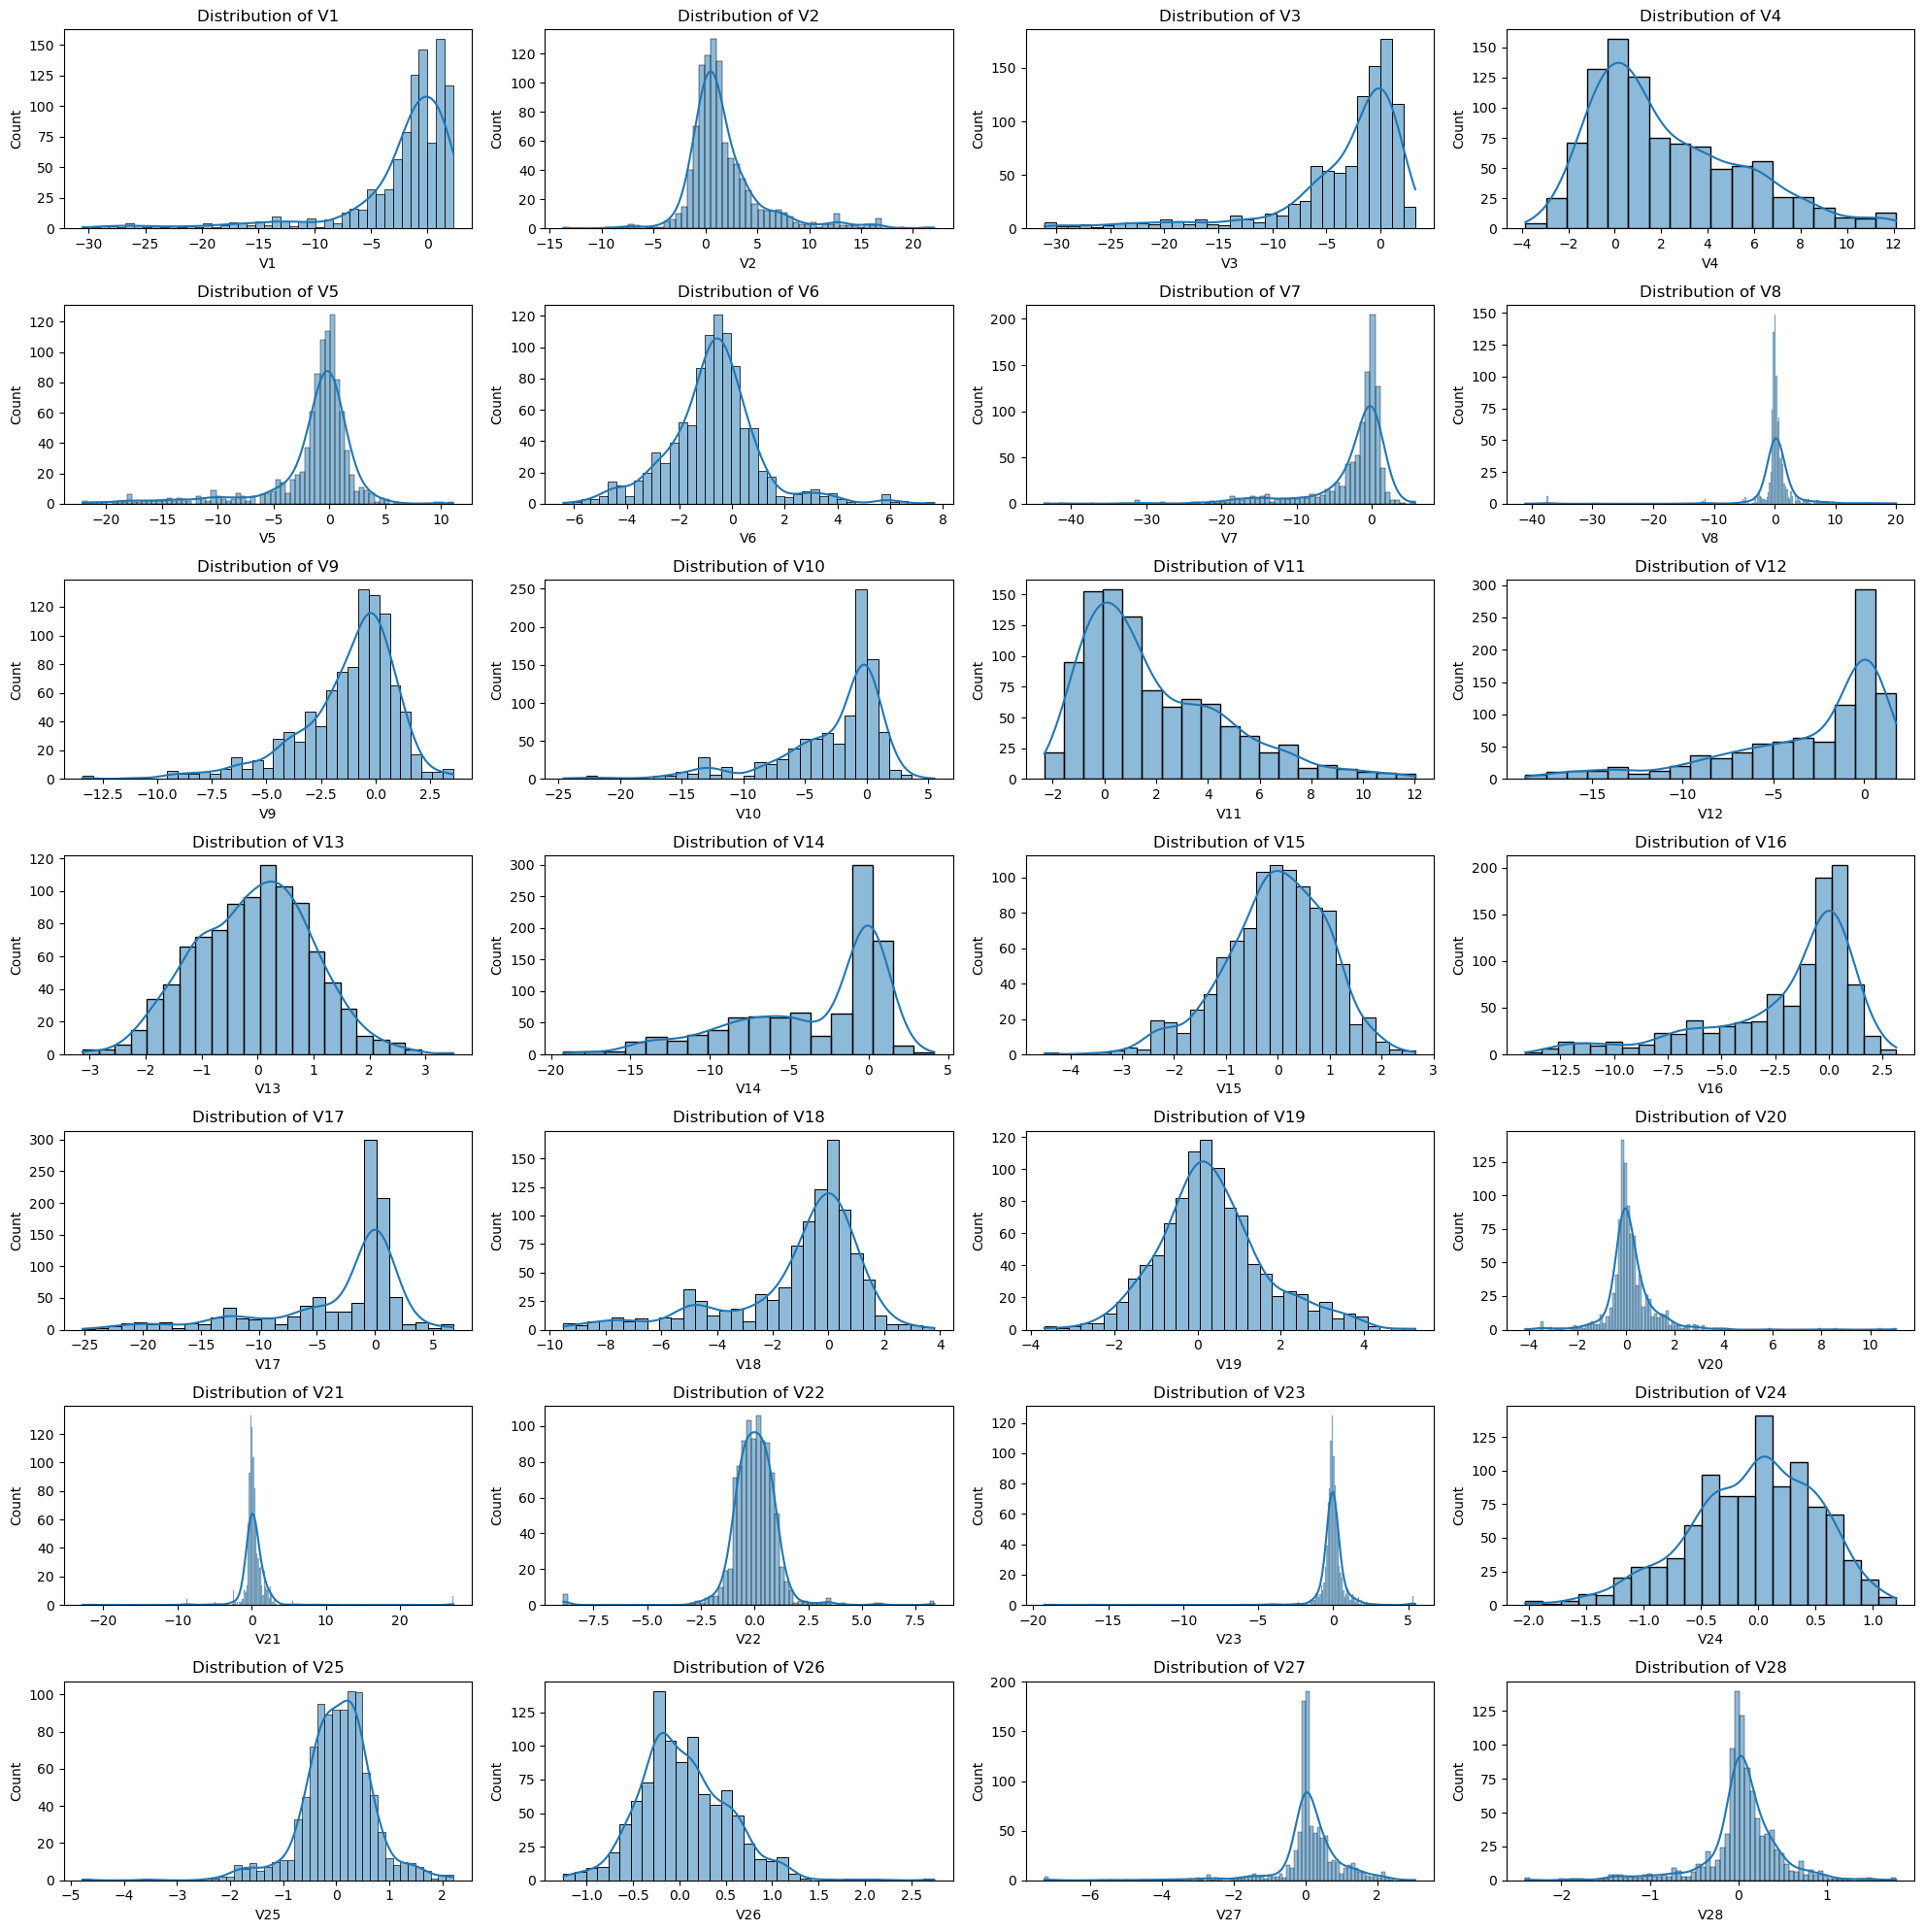

In [19]:
  

numerical_features = [f"V{i}" for i in range(1, 29)]

# Create a 7x4 grid for subplots
fig, axs = plt.subplots(7, 4, figsize=(20, 20))

# Flatten the axs array in case it's 2D (helps avoid indexing issues)
axs = axs.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(new_df[feature].dropna(), kde=True, ax=axs[i])  # Handle NaNs
    axs[i].set_title(f"Distribution of {feature}")

# Hide any unused subplots (if applicable)
for j in range(i + 1, len(axs)):
    axs[j].axis("off")

plt.tight_layout()
plt.show()


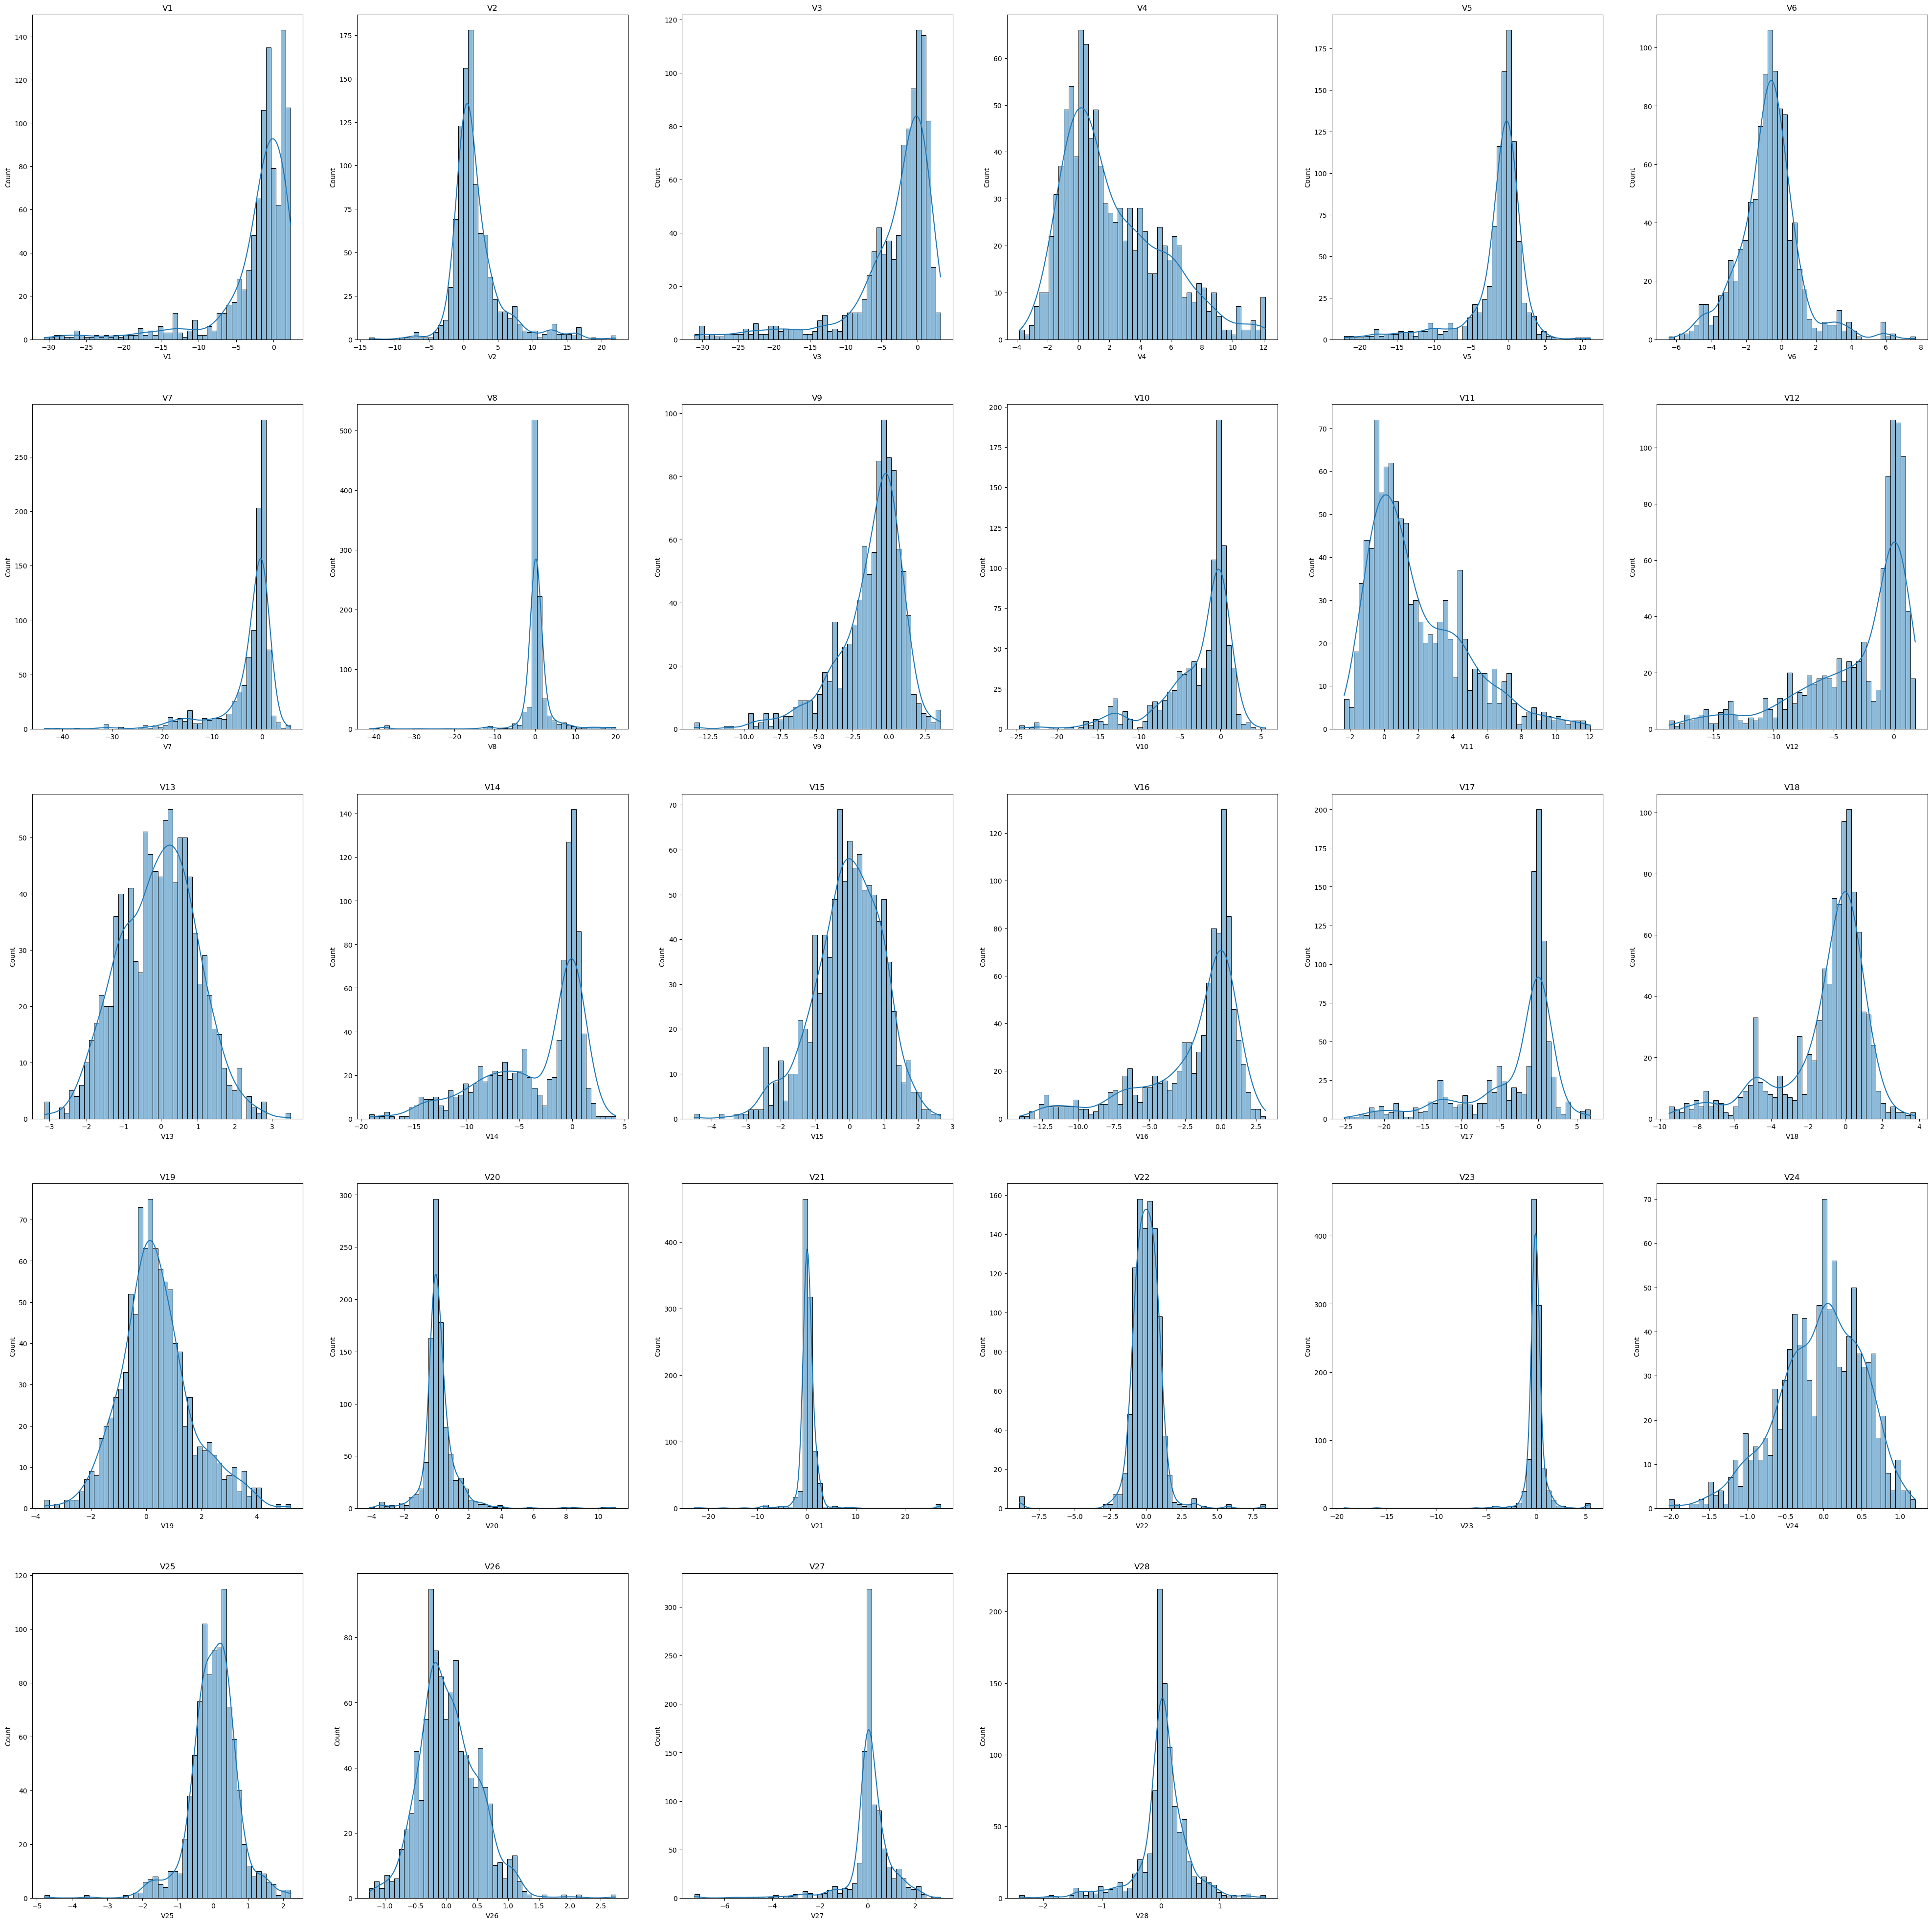

In [20]:
plt.figure(figsize=(50,50))

for i in range(1,29):
    plt.subplot(5,6,i)
    sns.histplot(new_df[f"V{i}"],bins=50,kde=True)
    plt.title(f"V{i}")
plt.show()
    

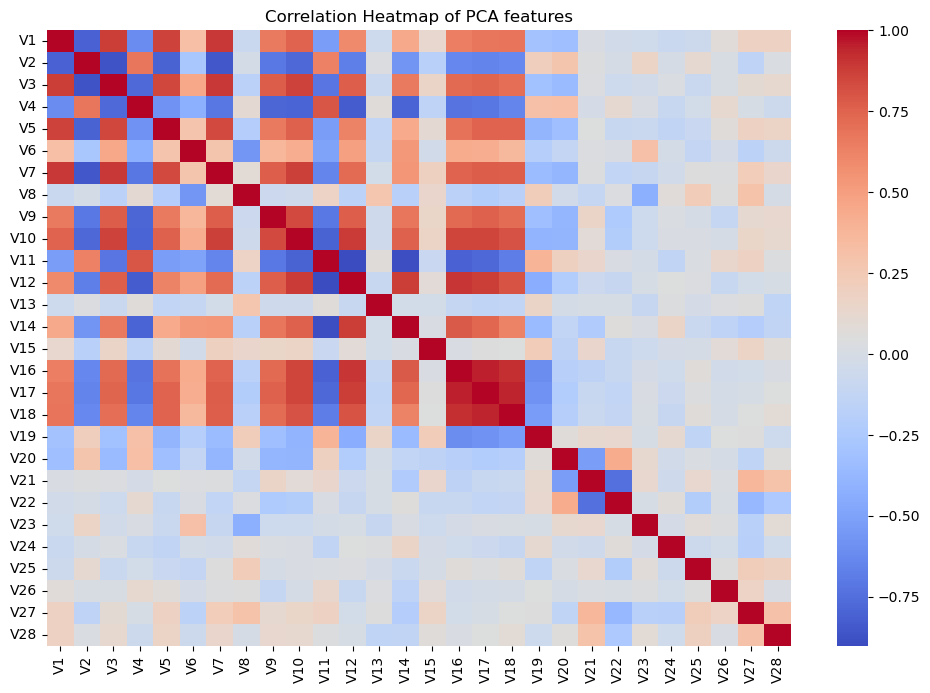

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(new_df.iloc[:,1:29].corr(),cmap='coolwarm',annot=False)
plt.title("Correlation Heatmap of PCA features")
plt.show()

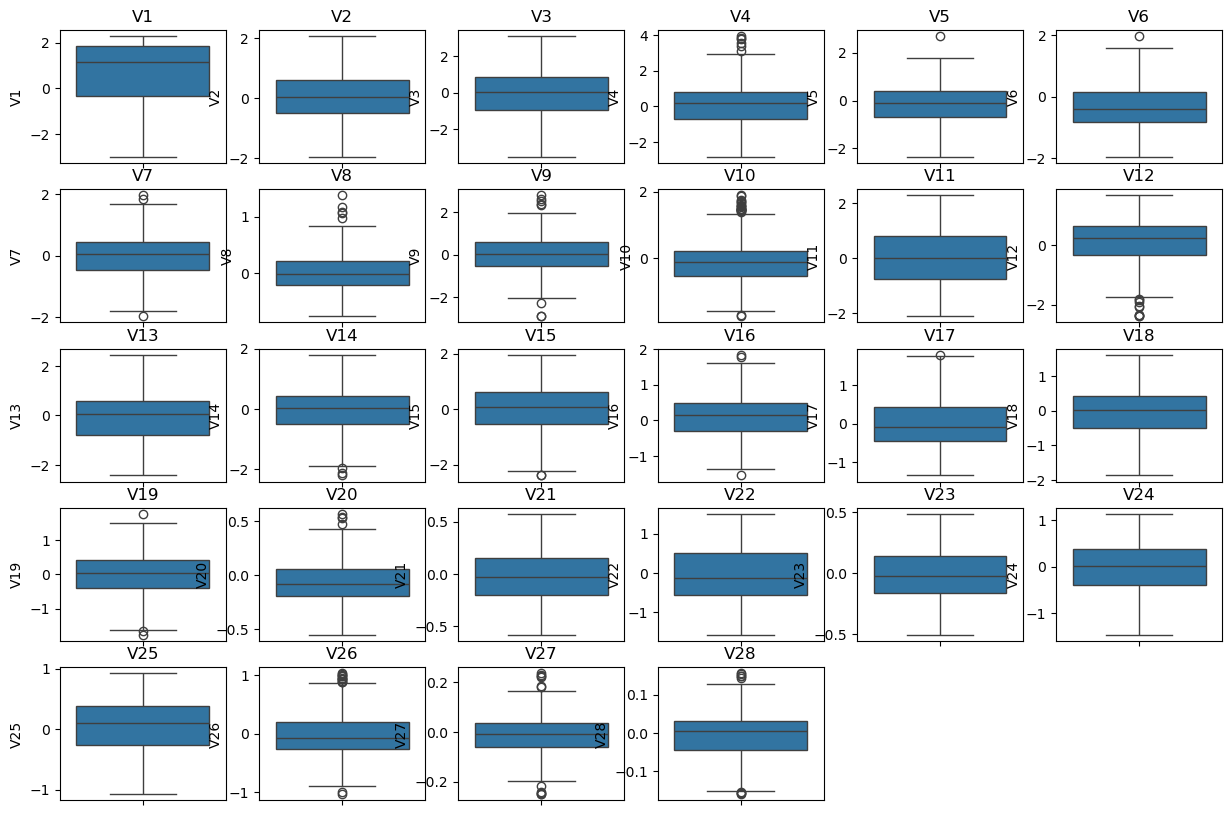

In [32]:
plt.figure(figsize=(15,10))
for i in range (1,29):
    plt.subplot(5,6,i)
    sns.boxplot(y=cleaned_df[f"V{i}"])
    plt.title(f"V{i}")
plt.show()

In [23]:
def remove_outliers_iqr(df, columns):
    new_df = df.copy()
    for col in columns:
        Q1 = new_df[col].quantile(0.25)
        Q3 = new_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        new_df = new_df[(new_df[col] >= lower_bound) & (new_df[col] <= upper_bound)]
    return new_df

# Assuming new_df is your original dataframe
columns_to_clean = [f"V{i}" for i in range(1, 29)]  # Columns V1 to V28
cleaned_df = remove_outliers_iqr(new_df, columns_to_clean)

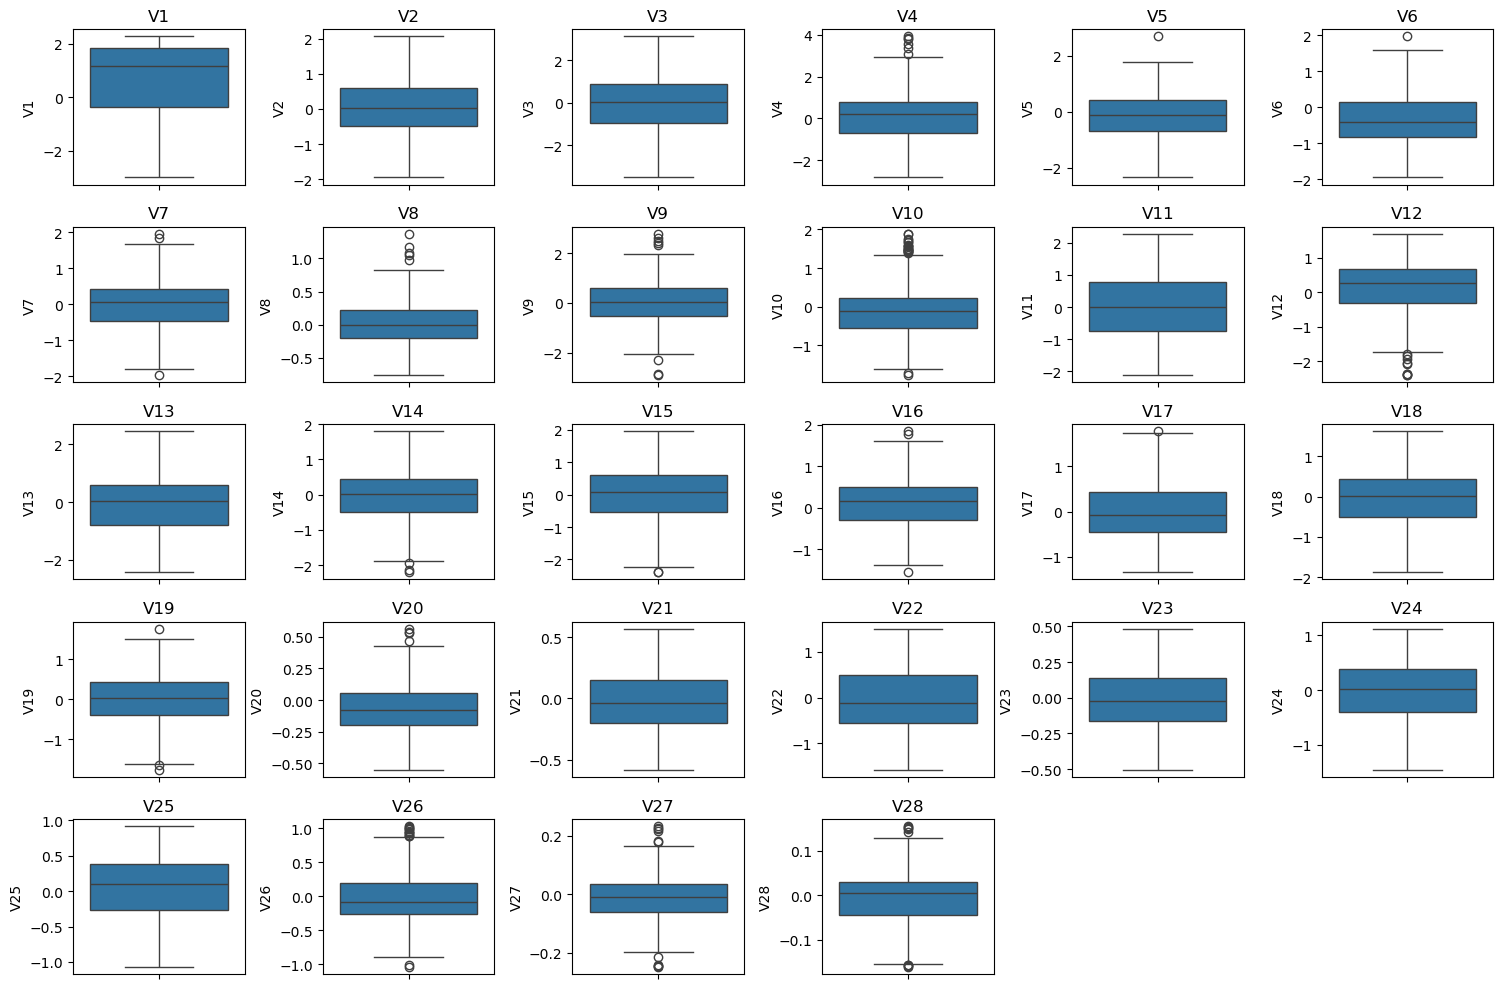

In [24]:
plt.figure(figsize=(15,10))
for i in range(1, 29):
    plt.subplot(5, 6, i)
    sns.boxplot(y=cleaned_df[f"V{i}"])
    plt.title(f"V{i}")
plt.tight_layout()
plt.show()

In [25]:
# print("Are all columns the same?", set(new_df.columns) == set(cleaned_df.columns))


Are all columns the same? True


C:\Users\USER\AppData\Local\Temp\ipykernel_14488\2199323101.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.subplots(5,6)


<Figure size 500x600 with 0 Axes>

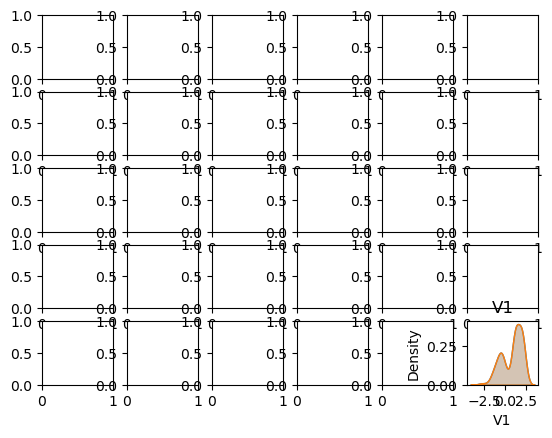

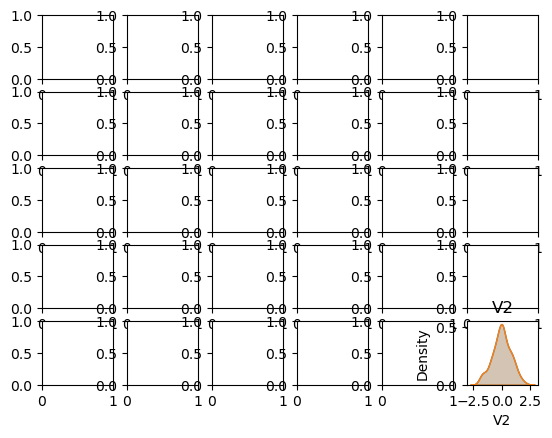

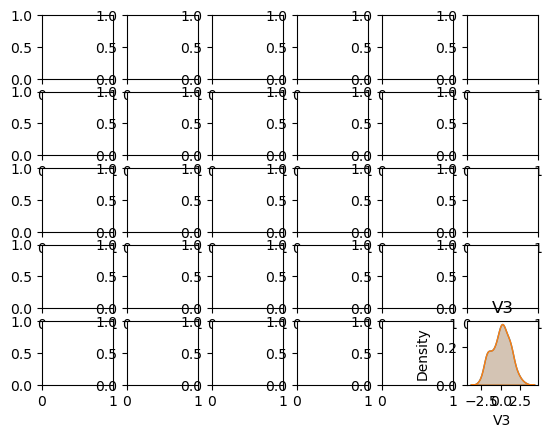

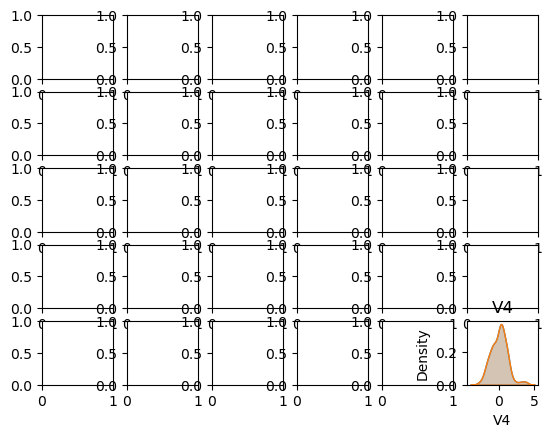

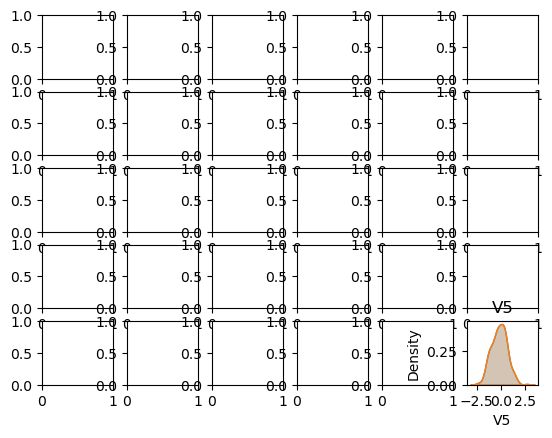

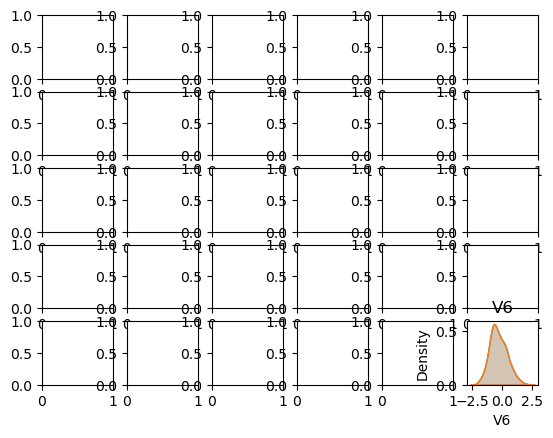

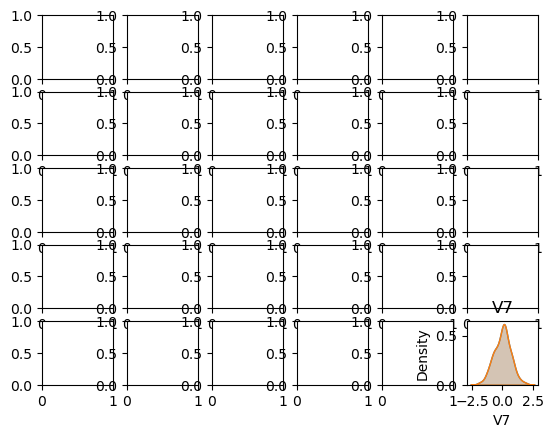

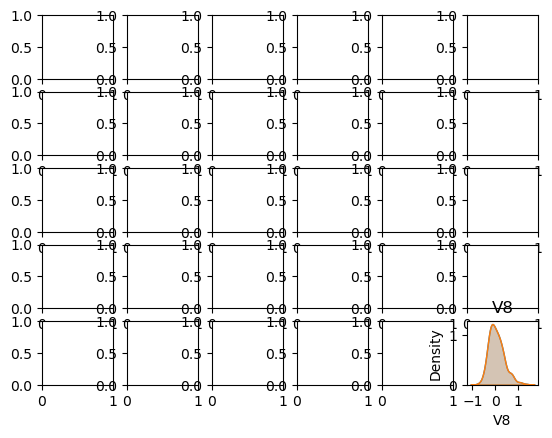

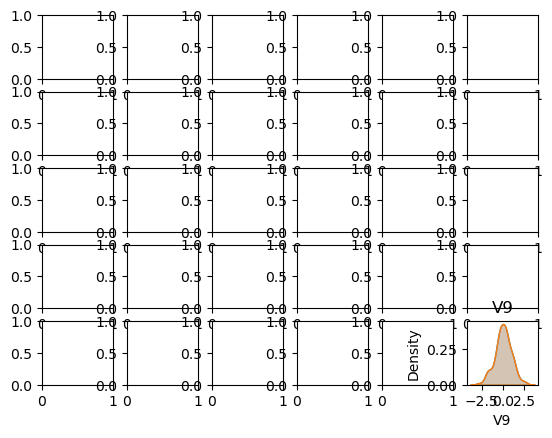

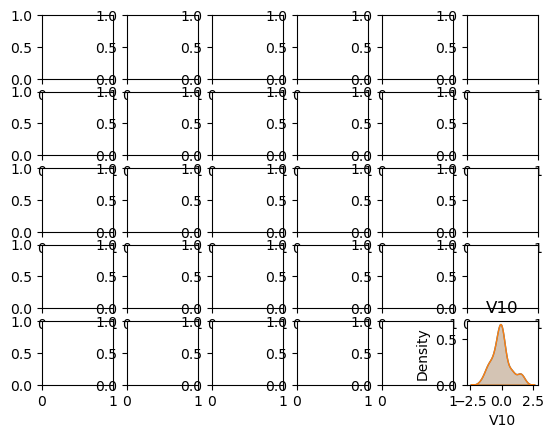

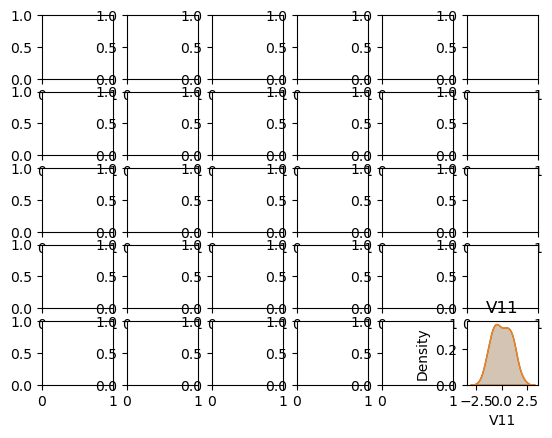

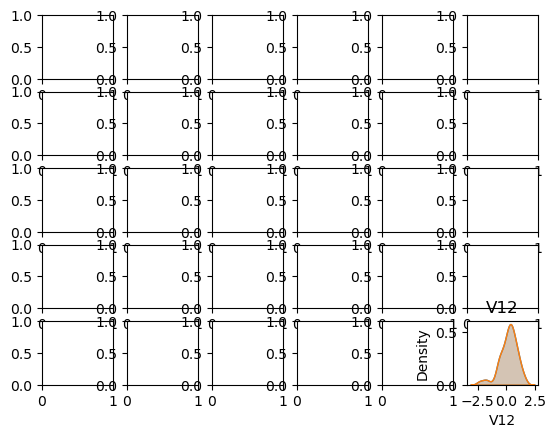

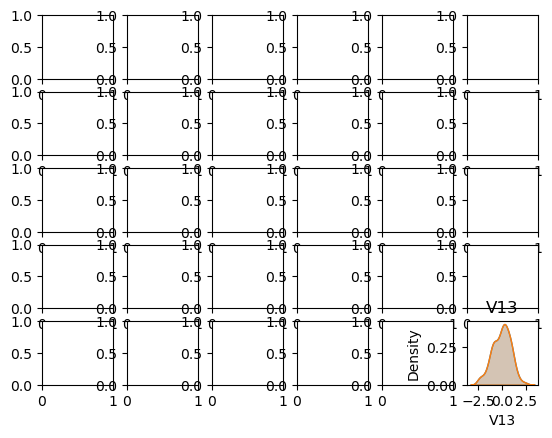

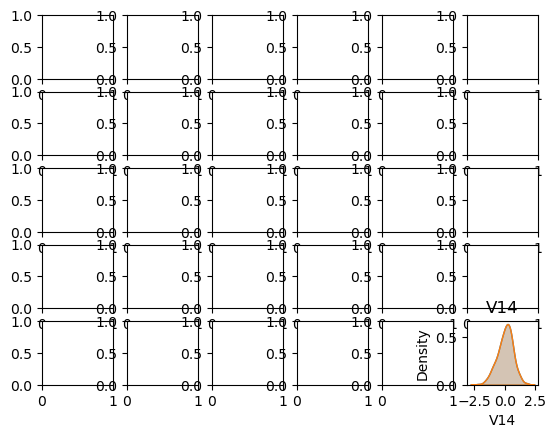

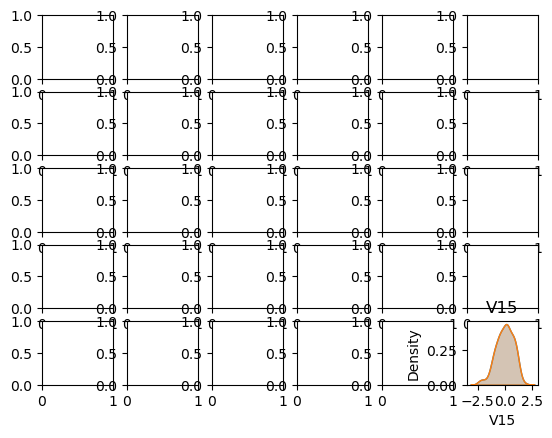

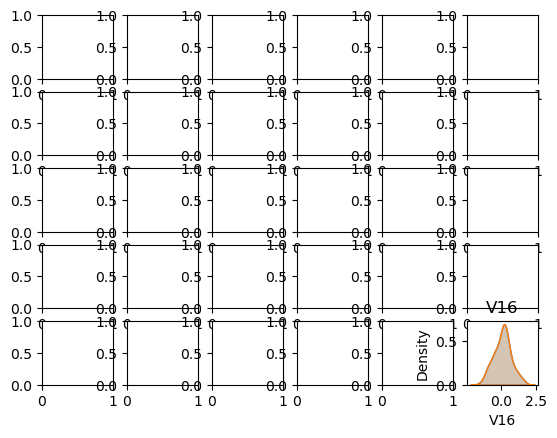

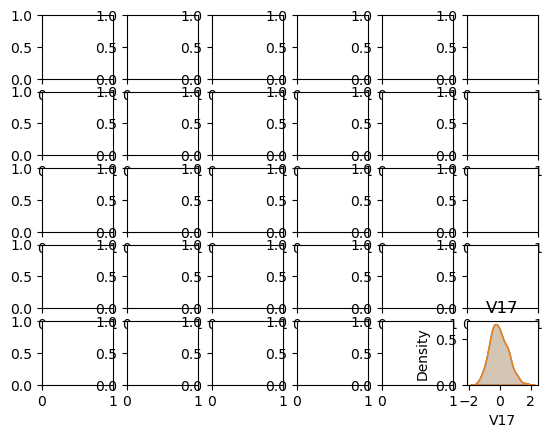

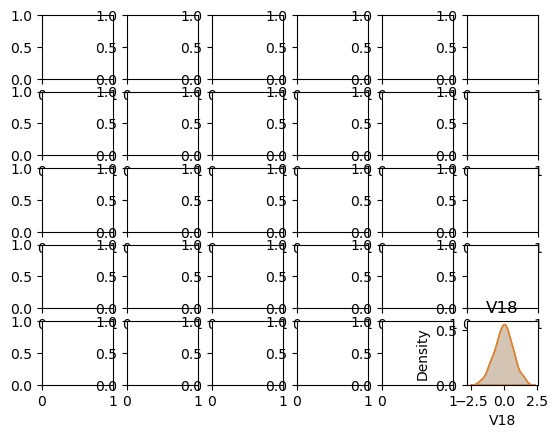

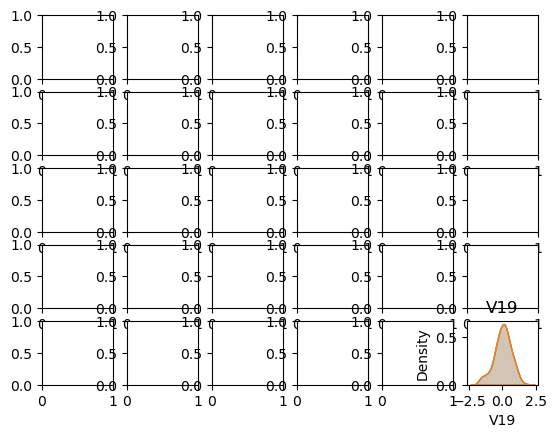

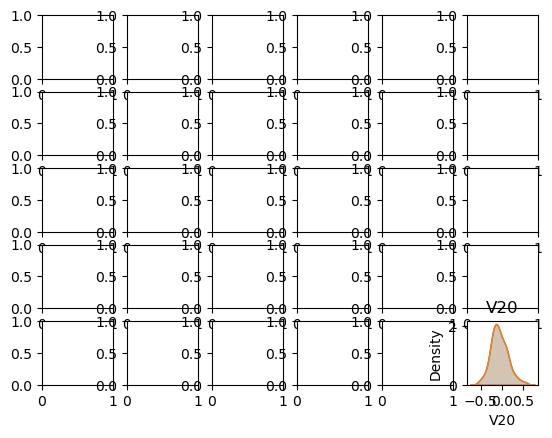

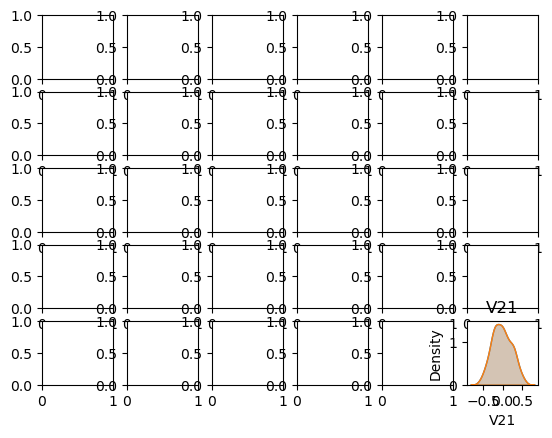

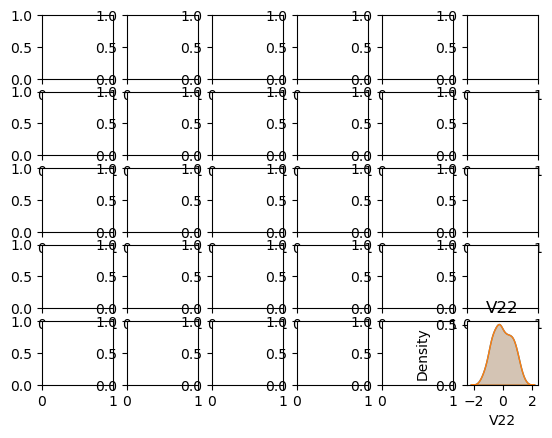

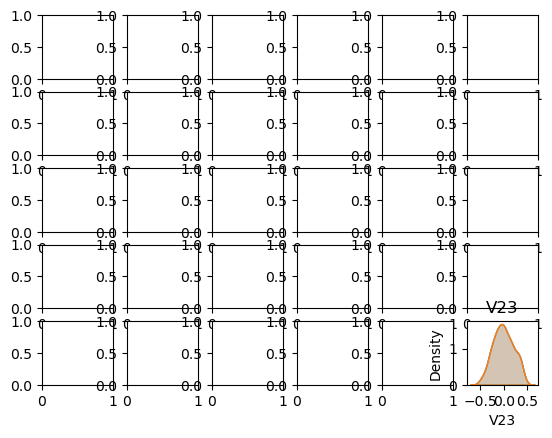

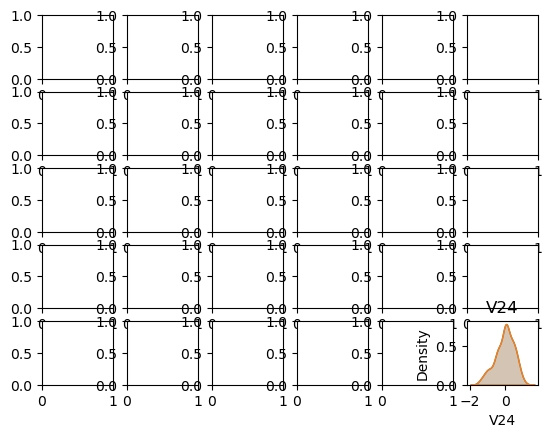

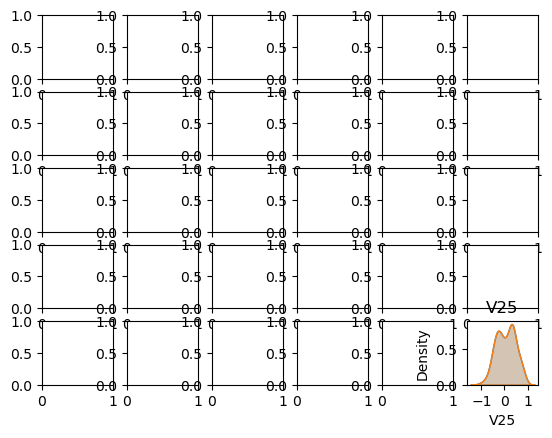

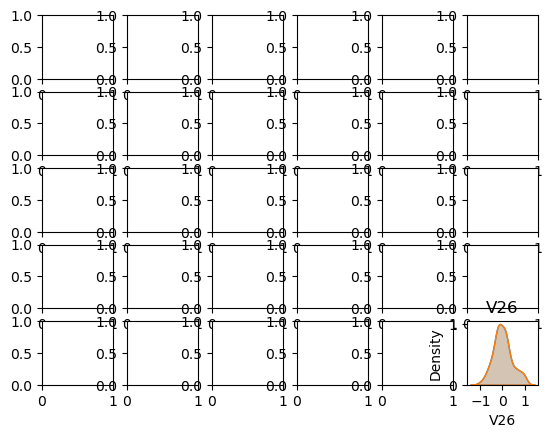

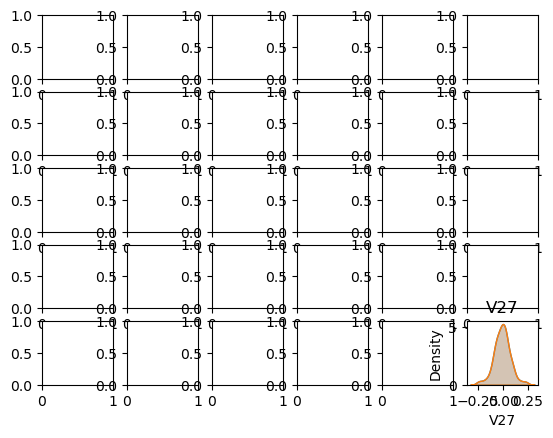

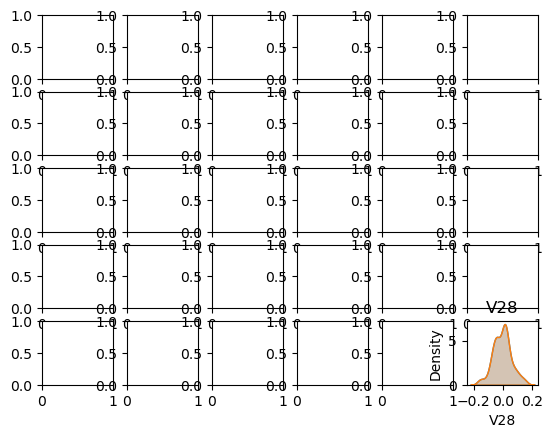

In [26]:
plt.figure(figsize=(5,6))
for i in range(1,29):
    plt.subplots(5,6)
    sns.kdeplot(cleaned_df[cleaned_df["Class"]==0][f"V{i}"],label="Non-Fraud",fill=True)
    sns.kdeplot(cleaned_df[cleaned_df["Class"]==0][f"V{i}"],label="Fraud",fill=True)
    plt.title(f"V{i}")
plt.show()


In [26]:
new_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,89253.304878,-2.505964,1.800657,-3.594149,2.274227,-1.550805,-0.767545,-2.754404,0.292201,-1.262883,...,0.364137,0.031885,-0.037292,-0.037702,0.011398,0.026171,0.067390,0.040768,107.544136,0.500000
std,48790.459742,5.577173,3.828335,6.210517,3.205155,4.252353,1.719848,5.876458,4.863237,2.351293,...,2.793967,1.175865,1.224412,0.555276,0.670602,0.494197,1.057679,0.447810,288.628785,0.500254
min,33.000000,-30.552380,-21.387180,-31.103685,-4.588447,-22.105532,-8.970099,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.309397,-7.263482,-1.963346,0.000000,0.000000
25%,45420.750000,-3.067635,-0.152600,-5.138122,-0.088599,-1.748353,-1.627172,-3.086853,-0.225775,-2.276695,...,-0.151831,-0.511517,-0.255695,-0.376581,-0.317337,-0.297931,-0.075550,-0.062428,1.290000,0.000000
50%,84204.000000,-0.823989,0.968177,-1.453245,1.327337,-0.426338,-0.690602,-0.589993,0.123062,-0.679257,...,0.163748,0.056418,-0.040818,0.013240,0.045744,-0.029126,0.046272,0.035682,19.065000,0.500000
75%,138077.250000,0.938789,2.886875,0.224802,4.276079,0.501190,0.027855,0.265494,0.893382,0.175448,...,0.655130,0.613252,0.195220,0.383208,0.388299,0.336080,0.463293,0.219111,99.990000,1.000000
max,171453.000000,2.315873,22.057729,3.725677,12.114672,13.321016,6.474115,7.946898,20.007208,10.348407,...,27.202839,8.361985,5.466230,1.165339,2.208209,2.745261,3.482498,3.276396,6130.210000,1.000000


In [27]:
new_df.shape

(984, 31)

In [28]:
new_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

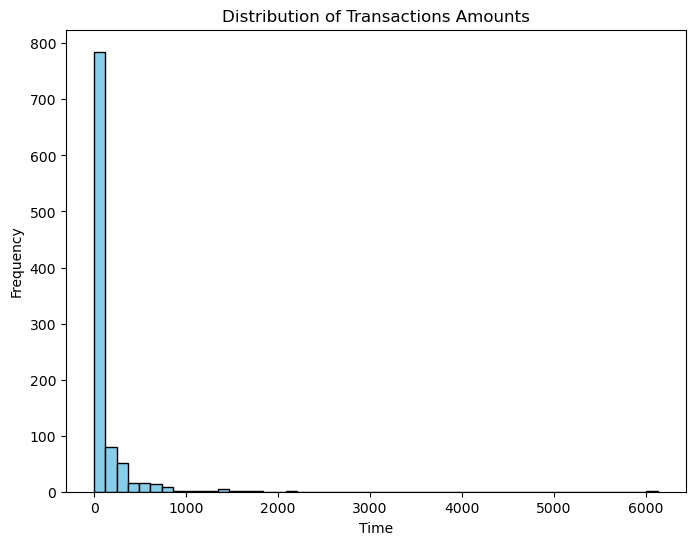

In [29]:
plt.figure(figsize=(8,6))
plt.hist(new_df['Amount'],bins=50,color='skyblue',edgecolor='black')
plt.title('Distribution of Transactions Amounts')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


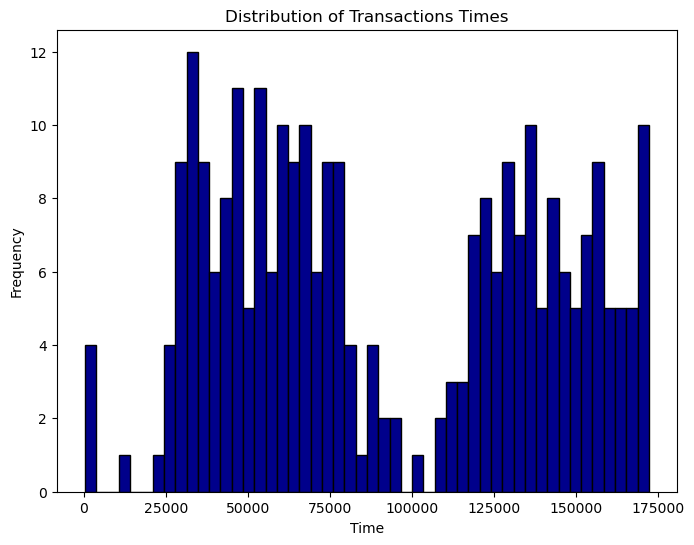

In [27]:
plt.figure(figsize=(8,6))
plt.hist(cleaned_df['Time'],bins=50,color='darkblue',edgecolor='black')
plt.title('Distribution of Transactions Times')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

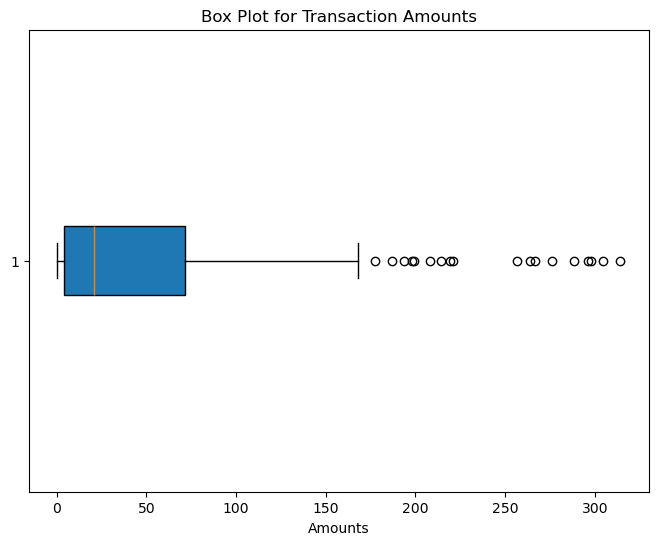

In [30]:
plt.figure(figsize=(8,6))
plt.boxplot(cleaned_df['Amount'],vert=False,patch_artist=True)
plt.title('Box Plot for Transaction Amounts')
plt.xlabel('Amounts')
plt.show()

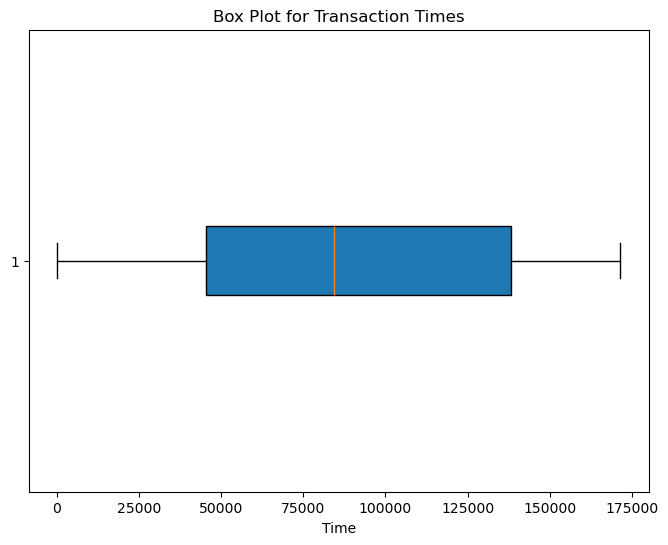

In [32]:
plt.figure(figsize=(8,6))
plt.boxplot(new_df['Time'],vert=False,patch_artist=True)
plt.title('Box Plot for Transaction Times')
plt.xlabel('Time')
plt.show()

In [33]:
# IQR=new_df['Amount'].quantile(0.75)-df['Amount'].quantile(0.25)
# lf=new_df['Amount'].quantile(0.25)-(IQR*3)
# uf=new_df['Amount'].quantile(0.75)+(IQR*3)
# print('Outliers for the amount are < {lbound} or > {ubound}'.format(lbound=lf, ubound=uf))

Outliers for the amount are < -281.88 or > 383.16


In [31]:
cleaned_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,...,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,92620.886861,0.771105,0.019067,-0.043685,0.123784,-0.131316,-0.335331,0.011185,0.041333,0.012563,...,-0.021532,-0.029464,-0.014060,-0.038384,0.065290,-0.008277,-0.010234,-0.002090,52.261241,0.076642
std,47714.409247,1.185483,0.800354,1.207928,1.172146,0.813338,0.699881,0.688451,0.333854,0.962849,...,0.240410,0.663150,0.211703,0.528422,0.413701,0.415297,0.080972,0.061500,68.932081,0.266510
min,430.000000,-3.003438,-1.953344,-3.530759,-2.834129,-2.356487,-1.957418,-1.962340,-0.755704,-2.890763,...,-0.581629,-1.572458,-0.503749,-1.457836,-1.072260,-1.038879,-0.249239,-0.161031,0.000000,0.000000
25%,50693.500000,-0.345413,-0.489455,-0.949295,-0.686198,-0.696265,-0.821521,-0.475491,-0.204361,-0.530265,...,-0.202913,-0.546942,-0.164018,-0.395446,-0.261113,-0.265312,-0.061101,-0.044287,4.122500,0.000000
50%,78155.000000,1.158579,0.026012,0.043334,0.204990,-0.116581,-0.399976,0.066302,-0.004436,0.020023,...,-0.033246,-0.115831,-0.025743,0.019342,0.105171,-0.076490,-0.008991,0.004763,20.715000,0.000000
75%,135807.250000,1.843471,0.605518,0.872090,0.786464,0.410830,0.152277,0.426376,0.225275,0.579769,...,0.149496,0.499774,0.137691,0.381522,0.378604,0.193091,0.034108,0.030134,71.500000,0.000000
max,172300.000000,2.281564,2.067431,3.120080,3.924748,2.689921,1.973887,1.950541,1.371913,2.771652,...,0.571033,1.501332,0.484108,1.125920,0.920281,1.034343,0.233842,0.156165,314.270000,1.000000


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cleaned_df['Amount'] = scaler.fit_transform(cleaned_df[['Amount']])

In [34]:
from sklearn.model_selection import train_test_split

X = cleaned_df.drop(columns='Class', axis=1)
y = cleaned_df['Class']

In [35]:
cleaned_df['Amount'].head()

32726    -0.638914
244257   -0.076465
45969     0.255482
19061    -0.748497
183360   -0.745009
Name: Amount, dtype: float64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(274, 30) (219, 30) (55, 30)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [39]:
logistic=LogisticRegression()
logistic.fit(X_train, y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pred=logistic.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [41]:
logistic.predict_proba(X_test)

array([[9.62637935e-01, 3.73620648e-02],
       [7.13329621e-01, 2.86670379e-01],
       [8.59282079e-01, 1.40717921e-01],
       [9.99096823e-01, 9.03177282e-04],
       [9.42230558e-01, 5.77694423e-02],
       [9.78186397e-01, 2.18136031e-02],
       [9.48858958e-01, 5.11410423e-02],
       [9.89199601e-01, 1.08003991e-02],
       [9.96933552e-01, 3.06644805e-03],
       [9.98395091e-01, 1.60490866e-03],
       [9.91543715e-01, 8.45628486e-03],
       [9.71912283e-01, 2.80877169e-02],
       [9.91305109e-01, 8.69489129e-03],
       [6.79835149e-01, 3.20164851e-01],
       [9.97112581e-01, 2.88741915e-03],
       [1.39736879e-01, 8.60263121e-01],
       [9.99231873e-01, 7.68127464e-04],
       [9.42275516e-01, 5.77244839e-02],
       [9.99369395e-01, 6.30605131e-04],
       [9.98437109e-01, 1.56289100e-03],
       [9.91413375e-01, 8.58662541e-03],
       [9.94419953e-01, 5.58004715e-03],
       [9.69073232e-01, 3.09267677e-02],
       [9.71876561e-01, 2.81234390e-02],
       [4.396703

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
X_train_prediction = logistic.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.958904109589041


In [44]:
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.8909090909090909
[[47  3]
 [ 3  2]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        50
           1       0.40      0.40      0.40         5

    accuracy                           0.89        55
   macro avg       0.67      0.67      0.67        55
weighted avg       0.89      0.89      0.89        55



In [45]:
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg','lbfgs','liblinear','sag','saga']

In [46]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [47]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
model=LogisticRegression()
randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,scoring='accuracy')

In [50]:
randomcv.fit(X_train,y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [53]:
randomcv.best_score_

0.9352172861404497

In [54]:
randomcv.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}

In [55]:
X_train_prediction = randomcv.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9466327827191868


In [56]:
y_pred=randomcv.predict(X_test)

In [57]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9238578680203046
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        96
           1       0.92      0.93      0.93       101

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197

[[88  8]
 [ 7 94]]


In [51]:
## Using Desicion tree


from sklearn.model_selection import train_test_split

X = cleaned_df.drop(columns='Class', axis=1)
y = cleaned_df['Class']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=2)

In [53]:
## apply Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier()

In [54]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
y_pred=treeclassifier.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix,classification_report

In [57]:
X_train_prediction = treeclassifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [58]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[47  3]
 [ 4  1]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        50
           1       0.25      0.20      0.22         5

    accuracy                           0.87        55
   macro avg       0.59      0.57      0.58        55
weighted avg       0.86      0.87      0.87        55



In [59]:
from sklearn.metrics import accuracy_score

score=accuracy_score(y_test,y_pred)
print(score)

0.8727272727272727


In [60]:
param={
    'criterion':['gini','entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [61]:
param

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
treemodel=DecisionTreeClassifier()

In [64]:
grid=GridSearchCV(treeclassifier,param_grid=param,cv=5,scoring='accuracy')

In [65]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [66]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 1,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [67]:
grid.best_score_

0.9451374207188161

In [68]:
X_train_prediction = grid.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9269406392694064


In [69]:
y_pred=grid.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [71]:
score

0.9090909090909091

In [72]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[50  0]
 [ 5  0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        50
           1       0.00      0.00      0.00         5

    accuracy                           0.91        55
   macro avg       0.45      0.50      0.48        55
weighted avg       0.83      0.91      0.87        55



In [73]:
from sklearn import tree
plt.figure(figsize=(30,20))
tree.plot_tree(treeclassifier,filled=True)

[Text(0.6666666666666666, 0.9444444444444444, 'x[14] <= -1.745\ngini = 0.135\nsamples = 219\nvalue = [203, 16]'),
 Text(0.6, 0.8333333333333334, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.6333333333333333, 0.8888888888888888, 'True  '),
 Text(0.7333333333333333, 0.8333333333333334, 'x[17] <= 1.131\ngini = 0.098\nsamples = 214\nvalue = [203, 11]'),
 Text(0.7, 0.8888888888888888, '  False'),
 Text(0.6, 0.7222222222222222, 'x[5] <= 1.775\ngini = 0.066\nsamples = 206\nvalue = [199, 7]'),
 Text(0.5333333333333333, 0.6111111111111112, 'x[14] <= -0.49\ngini = 0.057\nsamples = 205\nvalue = [199, 6]'),
 Text(0.4, 0.5, 'x[16] <= 1.282\ngini = 0.224\nsamples = 39\nvalue = [34, 5]'),
 Text(0.3333333333333333, 0.3888888888888889, 'x[15] <= 0.908\ngini = 0.149\nsamples = 37\nvalue = [34, 3]'),
 Text(0.2, 0.2777777777777778, 'x[12] <= -0.664\ngini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.13333333333333333, 0.16666666666666666, 'x[3] <= -0.662\ngini = 0.5\nsamples = 2\nvalue = [1, 1]

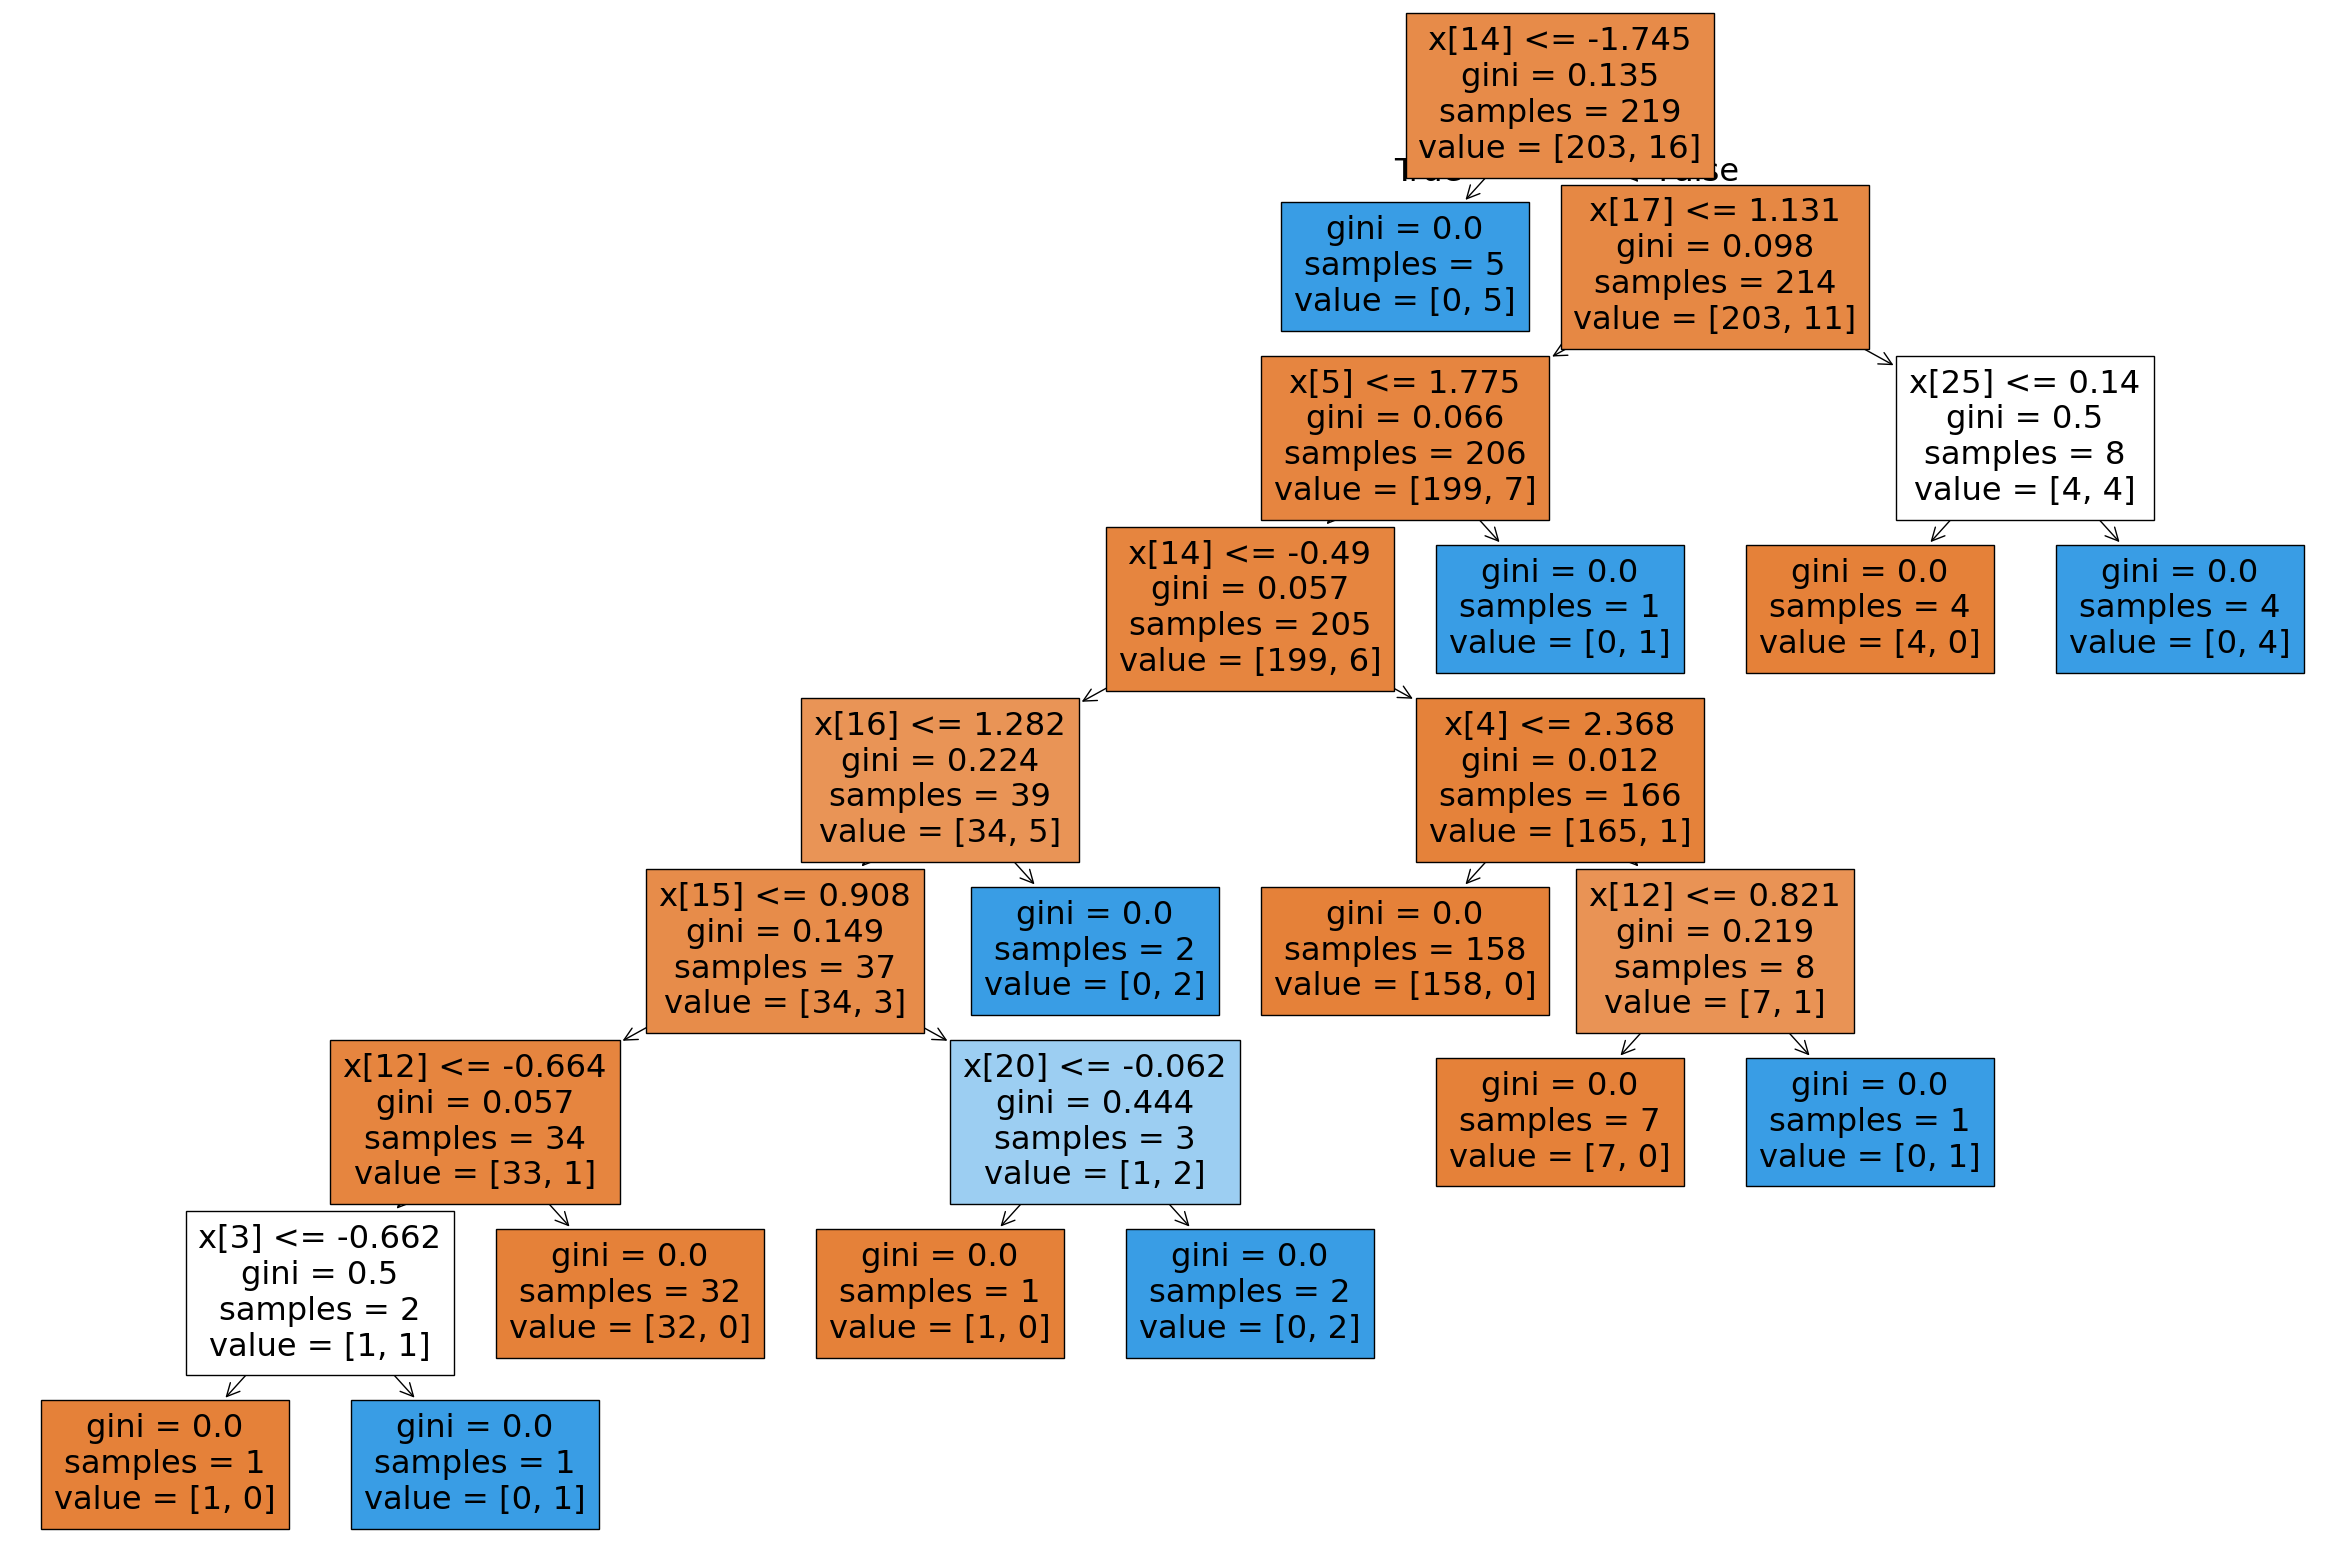

In [74]:
plt.show()

In [86]:
## Implementation using RandomForest algorithm

from sklearn.model_selection import train_test_split

X = cleaned_df.drop(columns='Class', axis=1)
y = cleaned_df['Class']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=2)

In [88]:
from sklearn.ensemble import RandomForestClassifier
RandomForest=RandomForestClassifier()

In [89]:
RandomForest.fit(X_train,y_train)

RandomForestClassifier()

In [90]:
 y_train_pred = RandomForest.predict(X_train)
 y_test_pred = RandomForest.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [92]:
model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


In [93]:
model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


In [94]:
    print('Random Forest Classifier')
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9091
- F1 score: 0.8658
- Precision: 0.0000
- Recall: 0.0000
- Roc Auc Score: 0.5000




In [95]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [96]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [97]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params)
                   
                   ]

In [98]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [99]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

for name, model, params in randomcv_models:
    if name == "Random Forest":  # Only run for Random Forest
        random = RandomizedSearchCV(estimator=model,
                                    param_distributions=params,
                                    n_iter=100,
                                    cv=3,
                                    verbose=2,
                                    n_jobs=-1)
        random.fit(X_train, y_train)
        model_param[name] = random.best_params_

if "Random Forest" in model_param:
    print(f"---------------- Best Params for Random Forest -------------------")
    print(model_param["Random Forest"])


In [100]:
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None)
}

In [101]:
# Make predictions
y_train_pred = randomcv.predict(X_train)
y_test_pred = randomcv.predict(X_test)

In [102]:
print('After applying HyperParameter tuning')

# Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc




print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))

print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



print('----------------------------------')

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


print('='*35)
print('\n')

After applying HyperParameter tuning
Model performance for Training set
- Accuracy: 0.9452
- F1 score: 0.9296
- Precision: 1.0000
- Recall: 0.2500
- Roc Auc Score: 0.6250
----------------------------------
Model performance for Test set
- Accuracy: 0.9273
- F1 score: 0.9044
- Precision: 1.0000
- Recall: 0.2000
- Roc Auc Score: 0.6000




In [103]:
## Implementation using Adaboost  algorithm

from sklearn.model_selection import train_test_split

X = cleaned_df.drop(columns='Class', axis=1)
y = cleaned_df['Class']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=2)

In [105]:
from sklearn.ensemble import AdaBoostClassifier
Adaboost = AdaBoostClassifier()

In [106]:
Adaboost.fit(X_train,y_train)

AdaBoostClassifier()

In [107]:
 y_train_pred = Adaboost.predict(X_train)
 y_test_pred = Adaboost.predict(X_test)

In [108]:
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [109]:
model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

In [110]:
model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


In [111]:
    print('Adaboost Classifier')
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Adaboost Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9273
- F1 score: 0.9044
- Precision: 1.0000
- Recall: 0.2000
- Roc Auc Score: 0.6000




In [112]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}
adaboost_param={
    "n_estimators":[50,60,70,80,90],
    "algorithm":['SAMME','SAMME.R']
}

In [113]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [114]:
adaboost_param

{'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']}

In [115]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   
    ("AB", AdaBoostClassifier(), adaboost_param)
                   
                   ]

In [116]:
randomcv_models

[('AB',
  AdaBoostClassifier(),
  {'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']})]

In [117]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

for name, model, params in randomcv_models:
    if name == "AdaBoost":  # Only run for AdaBoost
        random = RandomizedSearchCV(estimator=model,
                                    param_distributions=params,
                                    n_iter=100,
                                    cv=3,
                                    verbose=2,
                                    n_jobs=-1)
        random.fit(X_train, y_train)
        model_param[name] = random.best_params_

if "AdaBoost" in model_param:
    print(f"---------------- Best Params for AdaBoost -------------------")
    print(model_param["AdaBoost"])


In [118]:
models={
    "Adaboost":AdaBoostClassifier(n_estimators=80, algorithm='SAMME')
}

In [119]:
Adaboost.fit(X_train, y_train) # Train model

AdaBoostClassifier()

In [120]:
print ('Accuracy after hyperparameter tuning')
# Make predictions
y_train_pred = randomcv.predict(X_train)
y_test_pred = randomcv.predict(X_test)

# Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc




print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))

print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

print('----------------------------------')

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


print('='*35)
print('\n')

    
    

Accuracy after hyperparameter tuning
Model performance for Training set
- Accuracy: 0.9452
- F1 score: 0.9296
- Precision: 1.0000
- Recall: 0.2500
- Roc Auc Score: 0.6250
----------------------------------
Model performance for Test set
- Accuracy: 0.9273
- F1 score: 0.9044
- Precision: 1.0000
- Recall: 0.2000
- Roc Auc Score: 0.6000




In [121]:
## Implementation using  XGBoost   algorithm

from sklearn.model_selection import train_test_split

X = cleaned_df.drop(columns='Class', axis=1)
y = cleaned_df['Class']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=2)

In [123]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()

In [124]:
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [125]:
xgboost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [126]:
 y_train_pred = xgboost.predict(X_train)
 y_test_pred = xgboost.predict(X_test)

In [127]:
model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

In [128]:
model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc

In [129]:
print('xgboost classifier')

print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))

print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



print('----------------------------------')

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


print('='*35)
print('\n')

xgboost classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9273
- F1 score: 0.9044
- Precision: 1.0000
- Recall: 0.2000
- Roc Auc Score: 0.6000




In [130]:
## Hyperparameter Training

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

In [131]:
xgboost_params

{'learning_rate': [0.1, 0.01],
 'max_depth': [5, 8, 12, 20, 30],
 'n_estimators': [100, 200, 300],
 'colsample_bytree': [0.5, 0.8, 1, 0.3, 0.4]}

In [132]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   
    ("Xgboost", XGBClassifier(), xgboost_params)
                   
                   ]

In [133]:
randomcv_models

[('Xgboost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  {'learning_rate': [0.1, 0.01],
   'max_depth': [5, 8, 12, 20, 30],
   'n_estimators': [100, 200, 300],
   'colsample_bytree': [0.5, 0.8, 1, 0.3, 0.4]})]

In [134]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

for name, model, params in randomcv_models:
    if name == "XGBoost":  # Only run for XGBoost
        random = RandomizedSearchCV(estimator=model,
                                    param_distributions=params,
                                    n_iter=100,
                                    cv=3,
                                    verbose=2,
                                    n_jobs=-1)
        random.fit(X_train, y_train)
        model_param[name] = random.best_params_

if "XGBoost" in model_param:
    print(f"---------------- Best Params for XGBoost -------------------")
    print(model_param["XGBoost"])


In [135]:
models={
    "Xgboost":XGBClassifier(n_estimators=200,max_depth=12,learning_rate=0.1,
                           colsample_bytree=1)
}

In [136]:
xgboost.fit(X_train, y_train) # Train model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [137]:
y_train_pred = randomcv.predict(X_train)
y_test_pred = randomcv.predict(X_test)

In [138]:
print('After applying hyperparameter tuning')

# Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc




print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))

print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

print('----------------------------------')

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


print('='*35)
print('\n')



After applying hyperparameter tuning
Model performance for Training set
- Accuracy: 0.9452
- F1 score: 0.9296
- Precision: 1.0000
- Recall: 0.2500
- Roc Auc Score: 0.6250
----------------------------------
Model performance for Test set
- Accuracy: 0.9273
- F1 score: 0.9044
- Precision: 1.0000
- Recall: 0.2000
- Roc Auc Score: 0.6000




In [140]:
prediction=xgboost.predict(cleaned_df)
prediction

ValueError: feature_names mismatch: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'] ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
training data did not have the following fields: Class

In [144]:
cleaned_df = cleaned_df.drop(columns=['Class'], errors='ignore')  # Ensures no error if Class is already missing
prediction = xgboost.predict(cleaned_df)


In [145]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [146]:
prediction_proba=prediction[0]

In [147]:
prediction_proba

0

In [148]:
if prediction_proba > 0.5:
    print('The customer is non-fraud')
else:
    print('The customer is fraud')

The customer is fraud
